> # Model
> #### *Create Model that Will Be Used To Determine the Sentiment of Tweets*

### Import Required Libraries

In [29]:
import nltk
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

### Define Headers Since Data Set Does Not Have Any

In [2]:
headers = ["label", "id", "date", "query", "user", "text"]

### Read Training and Test Data and View Headers

In [3]:
test = pd.read_csv("../data/tweets_test.csv", engine="python", names=headers)
training = pd.read_csv("../data/tweets_training.csv", engine="python", names=headers)

In [4]:
test.head()

,label,id,date,query,user,text
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...


In [5]:
training.head()

,label,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


### Filter Out Neutral Polarity and Define Train and Test Variables

In [6]:
x_test, y_test = test.text[test.label != 2], test.label[test.label != 2]

In [7]:
x_train, y_train = training.text[training.label != 2], training.label[training.label != 2]

### Start Laying the Pipeline

In [17]:
tokenizer = nltk.casual.TweetTokenizer(preserve_case=False, reduce_len=True)

In [18]:
count_vect = CountVectorizer(tokenizer=tokenizer.tokenize, stop_words="english") 

In [19]:
tf_transformer = TfidfTransformer(use_idf=False)

In [20]:
classifier = LogisticRegression(solver="liblinear")

In [21]:
pipeline = Pipeline([("vectorizer", count_vect), 
                     ("tfidf", tf_transformer),
                     ("classifier", classifier)])

### Fit Pipeline With Training Data

In [22]:
pipeline.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<bound me...
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=False)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scalin

### Evaluate Model

In [23]:
predictions = pipeline.predict(x_test)

In [24]:
np.mean(predictions == y_test)

0.8189415041782729

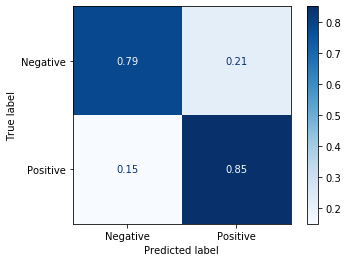

In [34]:
plot_confusion_matrix(pipeline, x_test, y_test, display_labels=["Negative", "Positive"], cmap=plt.cm.Blues, normalize="true")

### "Deploy" Model to Pickle File

In [25]:
pkl_filename = "../model.pkl"

with open(pkl_filename, 'wb') as file:
    pickle.dump(pipeline, file)